# **Regularized logistic regression**

In [18]:
### imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn; seaborn.set()

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

##sklearn model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [24]:
### read in data and get x and y
w8d = pd.read_csv("swe8there.csv")

y = w8d['y'].to_numpy()
x = w8d.iloc[:,0:-1].to_numpy()
n = len(y)
p = x.shape[1]

print("n,p: ",n,p)

n,p:  6166 200


In [29]:
### mle
#statsmodels
XX = sm.add_constant(x)
lfitM = sm.Logit(y, XX).fit()
#print(lfitM.summary())
bhatM = lfitM.params[1:] #drop intercept

         Current function value: 0.496945
         Iterations: 35


In [31]:
bhatM.shape

(200,)

In [32]:
## scale

## for this data all the x are on the same scale naturally, so we don't
##  need this
doscale=False

if doscale:
   scl = StandardScaler()
   X = scl.fit_transform(x)
   print("means should be 0, sds should be 1")
   print(X.mean(axis=0))
   print(X.std(axis=0))
else:
   X = x.copy()

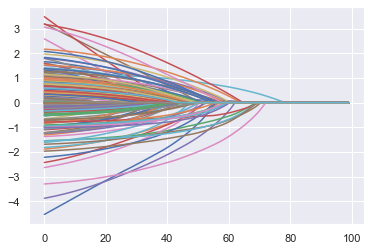

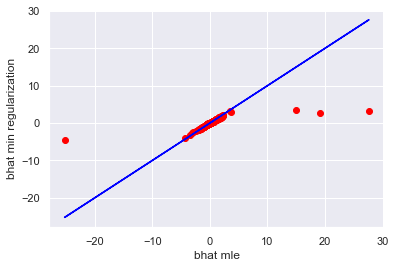

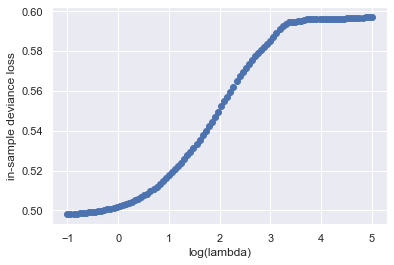

In [49]:
### fit logit  with L1 regularization

## choose grid for regularization parameter
llv = np.linspace(-1,5,100)
lv = np.exp(llv)
Cv = 1/lv
nC = len(Cv)

## fit regularized logit on grid
bmat = np.zeros((nC,p))
lfit = LogisticRegression(penalty='l1', solver = 'liblinear')
lLoss = np.zeros(nC)
for i in range(nC):
   lfit.C = Cv[i]
   lfit.fit(X,y)
   bmat[i,:] = lfit.coef_
   lLoss[i] = log_loss(y,lfit.predict_proba(X))



## plot LASSO path of coefficients
Bmat = pd.DataFrame(bmat)
Bmat.plot(kind='line',legend=False)
plt.show()

## plot MLE beta vs least regularized beta
plt.scatter(bhatM,bmat[0,:],c='red')
plt.plot(bhatM,bhatM,c='blue')
plt.xlabel('bhat mle'); plt.ylabel('bhat min regularization')
plt.show()


## plot in sample loss
plt.scatter(llv,lLoss)
plt.xlabel('log(lambda)'); plt.ylabel('in-sample deviance loss')
plt.show()

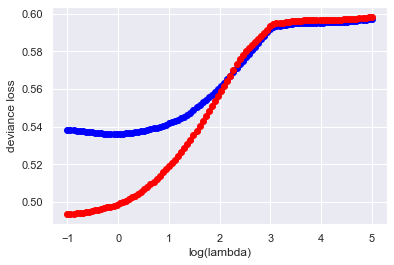

best C is:  1.030766840219941


In [48]:
### do simple train/test split with log_loss 

#train/test split
rng = np.random.RandomState(34)
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=rng, test_size=.2)

iLoss = np.zeros(nC)
oLoss = np.zeros(nC)
for i in range(nC):
   lfit.C = Cv[i]
   lfit.fit(Xtrain,ytrain)
   iLoss[i] = log_loss(ytrain,lfit.predict_proba(Xtrain))
   oLoss[i] = log_loss(ytest,lfit.predict_proba(Xtest))


## plot in and out of sample loss
plt.scatter(llv,oLoss,c='blue')
plt.scatter(llv,iLoss,c='red')
plt.xlabel('log(lambda)'); plt.ylabel('deviance loss')
plt.show()

best_C = Cv[np.argmin(oLoss)]
print("best C is: ",best_C)


In [35]:
### play log_loss to make sure it is the deviance

#from sklearn.metrics import log_loss
y_true = [0, 0, 1, 1]
y_pred = [[.9, .1], [.8, .2], [.3, .7], [.01, .99]]
print(log_loss(y_true, y_pred))

temp = -np.log(.9) -np.log(.8) - np.log(.7) - np.log(.99)
print(temp/4.0)


0.1738073366910675
0.1738073366910675
